In [5]:
import jieba
import jieba.analyse
import pandas as pd
import numpy
from collections import Counter

In [6]:
orgdata = pd.read_csv('臺北市街頭隨機強盜案件點位資訊.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 0: invalid start byte

In [3]:
orgdata.head()

NameError: name 'orgdata' is not defined

In [36]:
documents = ['我是臺師大科技系學生邱致瑋']
for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/臺師大/科技系/學生/邱致瑋


In [37]:
jieba.load_userdict('./userdict.txt')

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/臺師大/科技系/學生/邱致瑋


In [38]:
orgdata['seg'] = ""
orgdata.head()

,機構名稱,機構種類,縣市,區,地址全址,O_ABC,特約服務項目,特約縣市,特約區域,機構電話,機構負責人姓名,seg
0,銀之家長照股份有限公司附設彰化縣私立銀之家居家長照機構,1,10007,10007160,彰化縣永靖鄉瑚璉村多福路49號,B,居家服務,10007,10007010;10007020;10007030;10007040;10007050;1...,48220758,凃俊任,
1,財團法人台中市私立真愛社會福利慈善事業基金會附設私立共好社區長照機構,2,66000,66000280,臺中市大里區新里里13鄰鄰永隆路132號2樓,B,喘息服務,66000,66000010;66000020;66000030;66000040;66000050;6...,04-24062622,李頴彥,
2,宜寧居家護理所,B1,63000,63000110,臺北市士林區前港里承德路四段235號9樓,B,專業照護服務,65000,65000010;65000020;65000030;65000040;65000050;6...,02-28822382,張肇仙,
3,彰化基督教醫療財團法人彰化基督教醫院,B2,10007,10007010,彰化縣彰化市南校街135號,B,交通接送服務,10007,NaN,04-7238595#8466,陳穆寬,
4,基隆市私立美綠居家護理所居家式服務類長期照顧服務機構,1,10017,10017050,基隆市中山區中山里中山一路121號,B,喘息服務,10017,10017010;10017020;10017030;10017040;10017050;1...,02-24251695,李珮菁,


In [39]:
jieba.analyse.set_stop_words('stopwords.txt')
index = 0
for documents in orgdata['特約服務項目']:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

C:\Users\will_\AppData\Local\Temp\ipykernel_33400\3509243978.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
orgdata['seg']

0           [服務, 居家]
1           [服務, 喘息]
2       [專業, 照護, 服務]
3       [服務, 接送, 交通]
4           [服務, 喘息]
            ...     
3365        [巷弄, 照站]
3366        [服務, 居家]
3367    [托顧, 服務, 家庭]
3368       [營養餐, 服務]
3369        [巷弄, 照站]
Name: seg, Length: 3370, dtype: object

In [41]:
words = list(orgdata['O_ABC'])
show_key = pd.DataFrame(Counter(words).keys())
show_values = pd.DataFrame(Counter(words).values())

In [42]:
df = [show_key, show_values]

In [43]:
result = pd.concat(df, axis=1)
result.columns = ['O_ABC', 'freguency']
result

,O_ABC,freguency
0,B,2414
1,C,813
2,A,143


In [44]:
import plotly.express as px
import pandas as pd

px.bar(result, x='O_ABC', y='freguency', title='各縣市之機構種類數量')

In [45]:
show_sub = orgdata['O_ABC']=='B'
subdata = orgdata[show_sub]
subdata

,機構名稱,機構種類,縣市,區,地址全址,O_ABC,特約服務項目,特約縣市,特約區域,機構電話,機構負責人姓名,seg
0,銀之家長照股份有限公司附設彰化縣私立銀之家居家長照機構,1,10007,10007160,彰化縣永靖鄉瑚璉村多福路49號,B,居家服務,10007,10007010;10007020;10007030;10007040;10007050;1...,48220758,凃俊任,"[服務, 居家]"
1,財團法人台中市私立真愛社會福利慈善事業基金會附設私立共好社區長照機構,2,66000,66000280,臺中市大里區新里里13鄰鄰永隆路132號2樓,B,喘息服務,66000,66000010;66000020;66000030;66000040;66000050;6...,04-24062622,李頴彥,"[服務, 喘息]"
2,宜寧居家護理所,B1,63000,63000110,臺北市士林區前港里承德路四段235號9樓,B,專業照護服務,65000,65000010;65000020;65000030;65000040;65000050;6...,02-28822382,張肇仙,"[專業, 照護, 服務]"
3,彰化基督教醫療財團法人彰化基督教醫院,B2,10007,10007010,彰化縣彰化市南校街135號,B,交通接送服務,10007,NaN,04-7238595#8466,陳穆寬,"[服務, 接送, 交通]"
4,基隆市私立美綠居家護理所居家式服務類長期照顧服務機構,1,10017,10017050,基隆市中山區中山里中山一路121號,B,喘息服務,10017,10017010;10017020;10017030;10017040;10017050;1...,02-24251695,李珮菁,"[服務, 喘息]"
...,...,...,...,...,...,...,...,...,...,...,...,...
3363,高雄市私立家福居家長照機構,1,64000,64000090,高雄市前鎮區西甲里一心二路128號7樓之1(713室),B,居家服務,64000,64000050;64000060;64000080;64000090;64000110;6...,(07)3315836,彭雅芬,"[服務, 居家]"
3364,新北市私立沐心老人長期照顧中心(養護型),A1,65000,65000020,新北市三重區中興里重新路五段635之2號1-3樓,B,喘息服務,65000,65000010;65000020;65000030;65000040;65000050;6...,02-29990737,王寶琇,"[服務, 喘息]"
3366,廣元長照社團法人附設桃園市私立元德綜合長照機構,4,68000,68000010,桃園市桃園區泰山里003鄰潮洲街78號1樓,B,居家服務,68000,68000010,03-3322049,黃晟恆,"[服務, 居家]"
3367,高雄市私立珍愛家人社區(家庭托顧)長照機構,2,64000,64000150,高雄市大樹區九曲里九曲路125巷15號,B,家庭托顧服務,64000,64000010;64000020;64000030;64000040;64000050;6...,988871162,向言珍,"[托顧, 服務, 家庭]"


In [46]:
type(subdata['seg'])

pandas.core.series.Series

In [47]:
subdata_seg_list = subdata['seg'].tolist()
type(subdata_seg_list)

list

In [48]:
subdata_seg_list

[['服務', '居家'],
 ['服務', '喘息'],
 ['專業', '照護', '服務'],
 ['服務', '接送', '交通'],
 ['服務', '喘息'],
 ['服務', '喘息'],
 ['服務', '居家'],
 ['失能', '醫師', '照護', '服務', '居家', '家庭'],
 ['輔具', '無障礙', '環境', '服務', '居家'],
 ['日間', '照顧', '服務'],
 ['專業', '照護', '服務'],
 ['營養餐', '服務'],
 ['服務', '接送', '交通'],
 ['服務', '接送', '交通'],
 ['服務', '喘息'],
 ['日間', '照顧', '服務'],
 ['服務', '喘息'],
 ['服務', '喘息'],
 ['小規模', '服務'],
 ['服務', '接送', '交通'],
 ['日間', '照顧', '服務'],
 ['服務', '喘息'],
 ['專業', '照護', '服務'],
 ['服務', '喘息'],
 ['專業', '照護', '服務'],
 ['服務', '喘息'],
 ['服務', '喘息'],
 ['服務', '居家'],
 ['服務', '喘息'],
 ['服務', '喘息'],
 ['服務', '喘息'],
 ['服務', '居家'],
 ['服務', '喘息'],
 ['專業', '照護', '服務'],
 ['服務', '接送', '交通'],
 ['專業', '照護', '服務'],
 ['托顧', '服務', '家庭'],
 ['服務', '居家'],
 ['服務', '居家'],
 ['日間', '照顧', '服務'],
 ['輔具', '無障礙', '環境', '服務', '居家'],
 ['失能', '醫師', '照護', '服務', '居家', '家庭'],
 ['服務', '喘息'],
 ['服務', '喘息'],
 ['服務', '居家'],
 ['服務', '喘息'],
 ['服務', '居家'],
 ['服務', '喘息'],
 ['失能', '醫師', '照護', '服務', '居家', '家庭'],
 ['服務', '居家'],
 ['服務', '喘息'],
 ['服務', '喘息'],
 ['服務', '喘息'

In [49]:
flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat)

In [50]:
diction.keys()

dict_keys(['服務', '居家', '喘息', '專業', '照護', '接送', '交通', '失能', '醫師', '家庭', '輔具', '無障礙', '環境', '日間', '照顧', '營養餐', '小規模', '托顧', '團體', '車服務', '沐浴'])

In [51]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [52]:
import numpy as np

In [53]:
mask = np.array(Image.open("test.jpg"))
font = "C:\Windows\Fonts\MSJH.TTC"

In [54]:
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

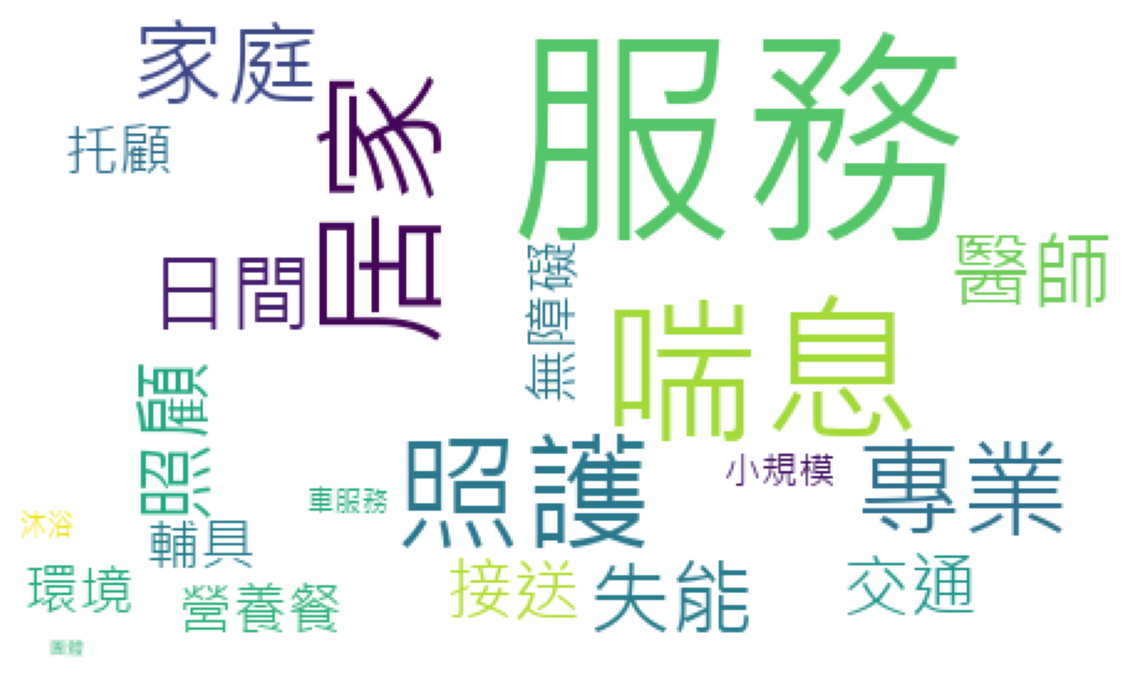

In [55]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [56]:
show_sub = orgdata['特約服務項目']=='日間照顧服務'
subdata = orgdata[show_sub]
subdata

,機構名稱,機構種類,縣市,區,地址全址,O_ABC,特約服務項目,特約縣市,特約區域,機構電話,機構負責人姓名,seg
9,財團法人高雄市郭吳麗珠社會福利慈善事業基金會私立鳳山社區(日間照顧)長照機構,2,64000,64000120,高雄市鳳山區三民里光遠路222號,B,日間照顧服務,64000,64000010;64000020;64000030;64000040;64000050;6...,07-7997255,郭光皓,"[日間, 照顧, 服務]"
16,高雄醫學大學附設高雄市私立大同建國社區(日間照顧)長照機構,2,64000,64000070,高雄市前金區草江里自立二路111號,B,日間照顧服務,64000,64000010;64000020;64000030;64000040;64000050;6...,07-2850631,楊俊毓,"[日間, 照顧, 服務]"
25,佛教慈濟醫療財團法人花蓮慈濟醫院,B2,10015,10015010,花蓮縣花蓮市民勤里中央路三段707號,B,日間照顧服務,10015,10015010,03-8465020,林欣榮,"[日間, 照顧, 服務]"
57,有限責任嘉義縣翔鶴照顧服務勞動合作社附設私立翔鶴蒜頭糖廠社區長照機構,2,10010,10010080,嘉義縣六腳鄉工廠村63號,B,日間照顧服務,10010,10010010;10010020;10010030;10010040;10010050;1...,05-3805358,李杰修,"[日間, 照顧, 服務]"
89,衛生福利部朴子醫院附設社區長照機構,2,10010,10010020,嘉義縣朴子市永和里42之50號,B,日間照顧服務,10010,10010010;10010020;10010030;10010040;10010050;1...,05-3790600#243,賴仲亮,"[日間, 照顧, 服務]"
...,...,...,...,...,...,...,...,...,...,...,...,...
3243,南投縣私立草屯長期照顧中心（養護型）,A1,10008,10008030,南投縣草屯鎮新豐里稻香路23之61號,B,日間照顧服務,10008,10008010;10008030,049-2318568,陳素梅,"[日間, 照顧, 服務]"
3254,財團法人彰化縣私立慈恩社會福利慈善事業基金會附設彰化縣私立二林慈恩社區式服務類長期照顧服務機構,2,10007,10007200,彰化縣二林鎮華崙里光復路83號,B,日間照顧服務,10007,10007010;10007020;10007030;10007040;10007050;1...,04-8681199,李金水,"[日間, 照顧, 服務]"
3323,財團法人彰化縣私立青山社會福利慈善事業基金會附設彰化縣私立陳茶社區長照機構,2,10007,10007100,彰化縣員林市三條里20鄰條和五街125號2、3樓,B,日間照顧服務,10007,10007010;10007020;10007030;10007040;10007050;1...,04-8383878,黃營,"[日間, 照顧, 服務]"
3327,財團法人高雄市私立萃文書院社會福利慈善事業基金會附設仁惠社區(日間照顧)長照機構,2,64000,64000050,高雄市三民區九如一路58號12樓,B,日間照顧服務,64000,64000050,07-3802030,黃碧恭,"[日間, 照顧, 服務]"


In [57]:
subdata.to_csv("test.csv", index=False)